<h1> Respostas para Dados - Q1 - Notebook </h1>

Olá leitor, este notebook tem como objetivo apresentar a solução da Q1 da cadeira de dados.

Então vamos lá!

Primeiro decidi separar a questão em tópicos para mais fácil compreensão deste material. Caso queira ver a questão completa, acessar o README.md desse diretório

<h2> Tabela guida <h2>

1. [ Parte 1 - Importanto bibliotecas. ](#1)
    
2. [ Parte 2 - Obtenha ](#2)
    
3. [ Resposta Parte 2 ](#3)
    
4. [ Parte 3 - Consolide](#4)
    
5. [ Resposta Parte 3 ](#5)
    
6. [ Extra 1 ](#6)
    
7. [ Extra 2 ](#7) 

<a name="1"></a>
<h2> Parte 1 - Importando bibliotecas </h2>

Primeiro vamos importar as bibliotecas utilizadas neste projeto:

In [34]:
#Importando bibliotecas
import pandas as pd
import requests
import pickle
import sys
from datetime import datetime, timedelta
import asyncio

<a name="2"></a>
<h2> Parte 2 - Obtenha </h2>

Obtenha (1 pt todos):

- a lista de estações automáticas.
- uma série de 14 dias contendo todas as variáveis da uma estação qualquer.

<br> Resposta </br>

Para obter essas duas repostas basta usar request, seguindo a [documentação da API](https://portal.inmet.gov.br/manual/manual-de-uso-da-api-esta%C3%A7%C3%B5es).

Primeira coisa que faremos são algumas funções para nos auxiliarem na montagem dessas requisições. Vamos lá.

In [35]:
#Função 1
def datas_requisicao(delta=14):
    '''
    Função para aquisição e tratamento de datas.

    Input: Inteiro(delta) representando o intervalo de dias para requisição. 
           Delta Default de 14 dias, como pedido na requisição do programa. 

    Output: Data de hoje e Data passada (-14 dias)
    
    OBSERVAÇÃO: foi visto que chegando a dias mais atuais as estação nao subiram seus dados climaticos. 
    Então se você observar, decidi não usar essa função na url_requisições(), ao invés coloquei as datas manualmente. 
    Porém a função funciona normalmente, basta descomentar 
    a 4° linha da função url_requisição 
    '''
    
    data_hoje = datetime.today()
    delta_entre_datas = delta
    data_passado = data_hoje - timedelta(days=delta_entre_datas)

    data_hoje_requisicao = data_hoje.strftime('%Y-%m-%d')
    data_passada_requisicao = data_passado.strftime('%Y-%m-%d')
  
    return data_passada_requisicao, data_hoje_requisicao

#Função 2
def url_requisicoes(tipo_estacao='T', codigo_estacao='A247'):
    '''
    Função para a 'fabricação' da requisição da API do INMET. 
    Ver documentação em: https://portal.inmet.gov.br/manual/manual-de-uso-da-api-esta%C3%A7%C3%B5es

    Input: Tipo da estação T ou M para primeira requisição. 
           Codigo da estacao para segunda requisição

    Output: Duas URL montadas para a requisição via API
    
    LER OBSERVAÇÃO da primeira função

    '''
    print (datas_requisicao()[0])
    print (datas_requisicao()[1])
    url_estacoes = f'https://apitempo.inmet.gov.br/estacoes/{tipo_estacao}'
    #LEIA A OBSERVAÇÃO DA PRIMIRA FUNÇÃO
    #url_estacoes_dadosdiarios = f'https://apitempo.inmet.gov.br/estacao/diaria/{datas_requisisao()[0]}/{datas_requisisao()[1]}/{codigo_estacao}'  
    data1 = "2019-07-01"
    data2 = "2019-07-14"
    url_estacoes_dadosdiarios = f'https://apitempo.inmet.gov.br/estacao/diaria/{data1}/{data2}/{codigo_estacao}'
    print (url_estacoes_dadosdiarios)
    return url_estacoes, url_estacoes_dadosdiarios

#Função 3

def requisicao_lista_estacao():
    """
    Função para requisição de lista das estações, gerando arquivo ListaEstacoes.json na pasta resposta_json
    """
    try:
        lista_estacoes = requests.get(url_requisicoes()[0])
        lista_estacoes_json = lista_estacoes.json()
        lista_estacoes.raise_for_status()
        with open('json/ListaEstacoes.json', 'wb') as dj:
            pickle.dump(lista_estacoes_json, dj)
        print("Requisição Lista de estações finalizado com Sucesso!")

    # Tratamento de erros
    except requests.exceptions.HTTPError as errh:
        print("Http Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error Connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout Error:", errt)
    except requests.exceptions.RequestException as err:
        print("OOps: Something Else", err)
        
#Função 4
def requisicao_serie_dias():
    """
    Função para requisição de serie de dias, gerando arquivo SerieDias.json na pasta resposta_json
    """
    try:
        serie_dias = requests.get(url_requisicoes()[1])
        serie_dias_json = serie_dias.json()
        serie_dias.raise_for_status()
        with open('json/SerieDias.json', 'wb') as dj:
            pickle.dump(serie_dias_json, dj)
        print("Requisicção serie dias finalizado com Sucesso!")

    # Tratamento de erros
    except requests.exceptions.HTTPError as errh:
        print("Http Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error Connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout Error:", errt)
    except requests.exceptions.RequestException as err:
        print("OOps: Something Else", err)  
        
#Função 5
def carregamento1_listaestacoes():
    '''
    Função para o carramento do arquivo json na main.
    Não é necessária esta função, porém ela se faz util caso o usuário queira visualizar o Json

    Output: variavel com dados .json gravados.
    '''

    try:
        with open('json/ListaEstacoes.json', 'rb') as fp:
            listas_estacoes = pickle.load(fp)
            return listas_estacoes
    except FileNotFoundError:
        print('Está faltando o arquivo ListaEstacoes.json')
        sys.exit(-1)

#Função 6
def carregamento2_serie_dias():
    '''
    Função para o carramento do arquivo .json na main.
    Não é necessária esta função, porém ela se faz util caso o usuário queira visualizar o Json

    Output: variavel com dados .json gravados.
    '''

    try:
        with open('json/SerieDias.json', 'rb') as fp:
            serie_dias = pickle.load(fp)
            return serie_dias
    except FileNotFoundError:
        print('Está faltando o arquivo SerieDias.json')
        sys.exit(-1)

<a name="3"></a>
<h3> Resposta Parte 2 </h3>

In [36]:
requisicao_lista_estacao()
requisicao_serie_dias()

2021-09-23
2021-10-07
https://apitempo.inmet.gov.br/estacao/diaria/2019-07-01/2019-07-14/A247
Requisição Lista de estações finalizado com Sucesso!
2021-09-23
2021-10-07
https://apitempo.inmet.gov.br/estacao/diaria/2019-07-01/2019-07-14/A247
Requisicção serie dias finalizado com Sucesso!


<a name="4"></a>
<h2> Parte 3 - Consolide </h2>

Consolide (1 pt todos):

- a lista das estações automáticas em um dataframe.
- a série de 14 dias de dados em um dataframe.



In [37]:
listas_estacoes_json = carregamento1_listaestacoes()
serie_dias_json = carregamento2_serie_dias()


In [38]:
listas_estacoes_df = pd.DataFrame.from_dict(
    listas_estacoes_json, orient='columns')

serie_dias_df = pd.DataFrame.from_dict(
    serie_dias_json, orient='columns')

In [39]:
listas_estacoes_df_final = listas_estacoes_df[["DC_NOME","CD_ESTACAO"]]

<a name="5"></a>
<h3> Resposta parte 3 </h3

In [40]:
listas_estacoes_df_final.head()

,DC_NOME,CD_ESTACAO
0,ABROLHOS,A422
1,ACARAU,A360
2,AFONSO CLAUDIO,A657
3,AGUA BOA,A908
4,AGUA CLARA,A756


In [41]:
serie_dias_df.head()

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,67.5,2019-07-01,XINGUARA,40,25.8,0,-7.110518,18.4,34,PA,None,A247,-49.926072
1,66.5,2019-07-02,XINGUARA,36,26.1,0,-7.110518,18.2,34.7,PA,None,A247,-49.926072
2,67.4,2019-07-03,XINGUARA,42,26.3,0,-7.110518,19.9,34,PA,None,A247,-49.926072
3,71.6,2019-07-04,XINGUARA,43,26.3,0,-7.110518,20,34.7,PA,None,A247,-49.926072
4,72.3,2019-07-05,XINGUARA,44,26.8,0,-7.110518,20.6,34.7,PA,None,A247,-49.926072


<a name="6"></a>
<h2> Extra 1 - async </h2>

- use requisições assíncronas ou threadding para coletar dados de 15 estações (1 pt).

Resposta
---
Olhar arquivo main.py


<a name="7"></a>
<h2> Extra 2 - há falhas nos dados? Crie uma forma de verificar (0.5 pt).</h2>

listas_estações

<BarContainer object of 15 artists>

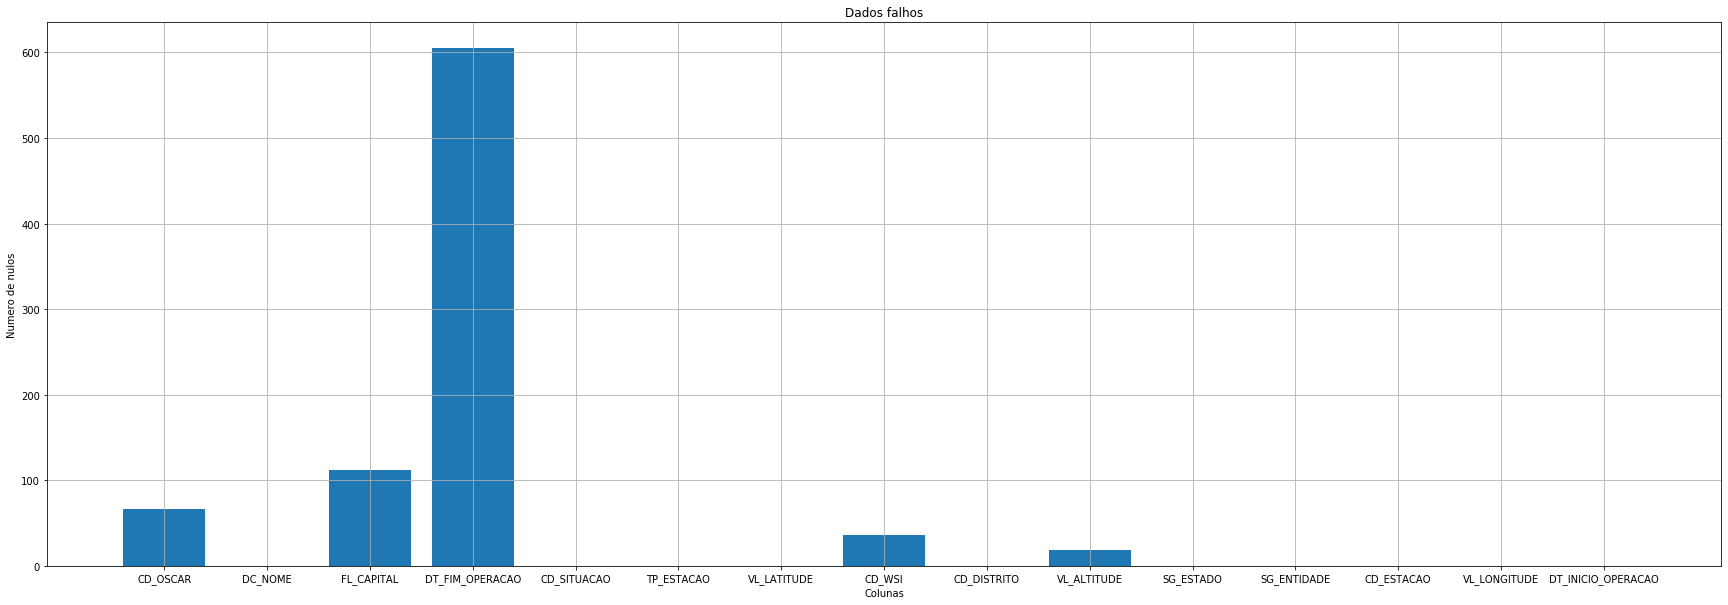

In [42]:
import matplotlib.pyplot as plt
nan_columns = []
nan_values = []

for column in listas_estacoes_df.columns:
    nan_columns.append(column)
    nan_values.append(listas_estacoes_df[column].isnull().sum())

fig, ax = plt.subplots(figsize=(30,10))
ax.set(xlabel='Colunas', ylabel='Numero de nulos',
       title='Dados falhos')
ax.grid()
plt.bar(nan_columns, nan_values)

serie_dias_df

<BarContainer object of 13 artists>

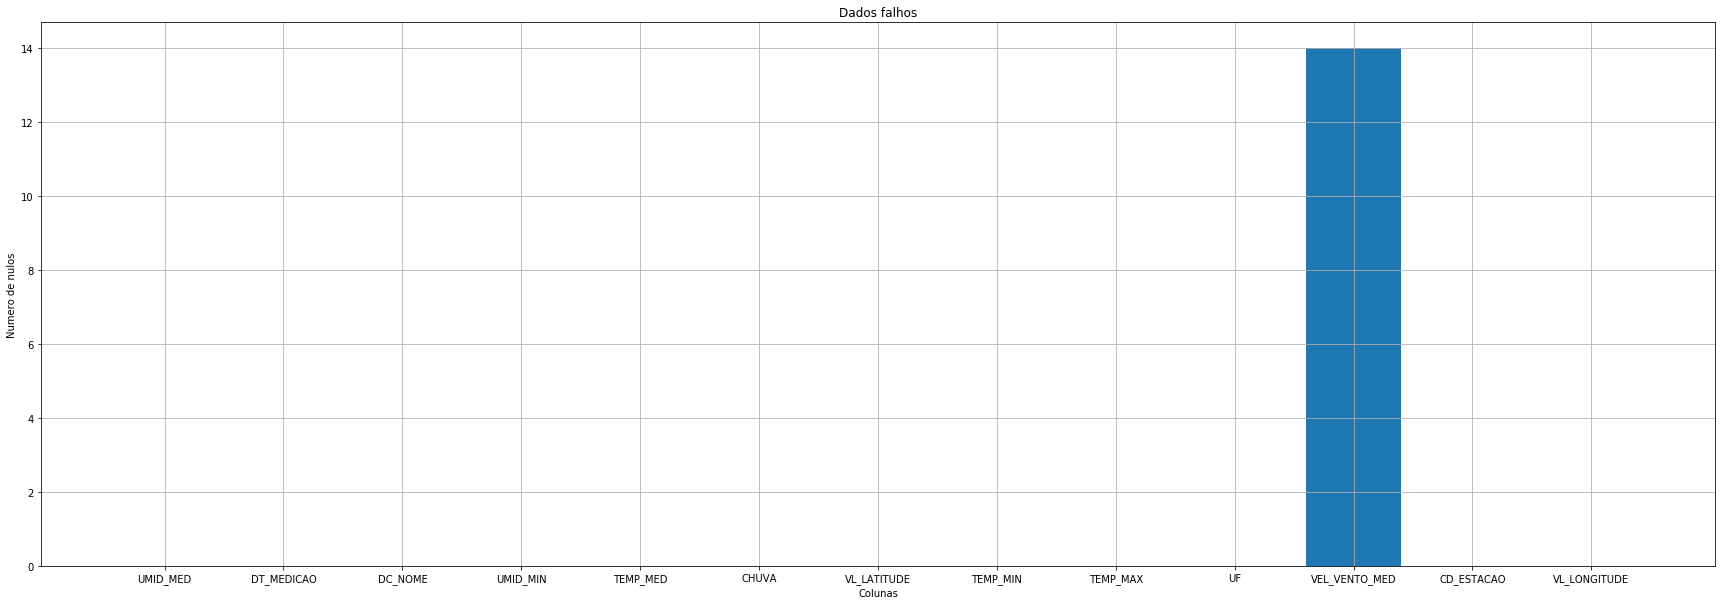

In [43]:
import matplotlib.pyplot as plt
nan_columns = []
nan_values = []

for column in serie_dias_df.columns:
    nan_columns.append(column)
    nan_values.append(serie_dias_df[column].isnull().sum())

fig, ax = plt.subplots(figsize=(30,10))
ax.set(xlabel='Colunas', ylabel='Numero de nulos',
       title='Dados falhos')
ax.grid()
plt.bar(nan_columns, nan_values)